# Mod 4 Project - Starter Notebook

This notebook has been provided to you so that you can make use of the following starter code to help with the trickier parts of preprocessing the Zillow dataset. 

The notebook contains a rough outline the general order you'll likely want to take in this project. You'll notice that most of the areas are left blank. This is so that it's more obvious exactly when you should make use of the starter code provided for preprocessing. 

**_NOTE:_** The number of empty cells are not meant to infer how much or how little code should be involved in any given step--we've just provided a few for your convenience. Add, delete, and change things around in this notebook as needed!

# Some Notes Before Starting

This project will be one of the more challenging projects you complete in this program. This is because working with Time Series data is a bit different than working with regular datasets. In order to make this a bit less frustrating and help you understand what you need to do (and when you need to do it), we'll quickly review the dataset formats that you'll encounter in this project. 

## Wide Format vs Long Format

If you take a look at the format of the data in `zillow_data.csv`, you'll notice that the actual Time Series values are stored as separate columns. Here's a sample: 

<img src='https://raw.githubusercontent.com/learn-co-students/dsc-mod-4-project-seattle-ds-102819/master/images/df_head.png'>

You'll notice that the first seven columns look like any other dataset you're used to working with. However, column 8 refers to the median housing sales values for April 1996, column 9 for May 1996, and so on. This This is called **_Wide Format_**, and it makes the dataframe intuitive and easy to read. However, there are problems with this format when it comes to actually learning from the data, because the data only makes sense if you know the name of the column that the data can be found it. Since column names are metadata, our algorithms will miss out on what dates each value is for. This means that before we pass this data to our ARIMA model, we'll need to reshape our dataset to **_Long Format_**. Reshaped into long format, the dataframe above would now look like:

<img src='https://raw.githubusercontent.com/learn-co-students/dsc-mod-4-project-seattle-ds-102819/master/images/melted1.png'>

There are now many more rows in this dataset--one for each unique time and zipcode combination in the data! Once our dataset is in this format, we'll be able to train an ARIMA model on it. The method used to convert from Wide to Long is `pd.melt()`, and it is common to refer to our dataset as 'melted' after the transition to denote that it is in long format. 

# Helper Functions Provided

Melting a dataset can be tricky if you've never done it before, so you'll see that we have provided a sample function, `melt_data()`, to help you with this step below. Also provided is:

* `get_datetimes()`, a function to deal with converting the column values for datetimes as a pandas series of datetime objects
* Some good parameters for matplotlib to help make your visualizations more readable. 

Good luck!


# Step 1: Load the Data/Filtering for Chosen Zipcodes

In [1]:
import pandas as pd 
from matplotlib import pyplot
import matplotlib  
import numpy as np
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame

In [2]:
df = pd.read_csv('zillow_data.csv')

In [3]:
df.drop(columns= 'RegionID',inplace=True)
df.drop(columns= 'SizeRank',inplace=True)

# Step 2: Data Preprocessing

In [4]:
def get_datetimes(df):
    return pd.to_datetime(df.columns.values[7:], format='%Y-%m')

In [5]:
get_datetimes(df)

DatetimeIndex(['1996-06-01', '1996-07-01', '1996-08-01', '1996-09-01',
               '1996-10-01', '1996-11-01', '1996-12-01', '1997-01-01',
               '1997-02-01', '1997-03-01',
               ...
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01',
               '2018-03-01', '2018-04-01'],
              dtype='datetime64[ns]', length=263, freq=None)

In [6]:
cities = ['Austin', 'Raleigh','Atlanta','Phoenix','Miami','Huntsville','Baltimore']

In [7]:
selected = df[df['City'].isin(cities)]

In [8]:
selected

,RegionName,City,State,Metro,CountyName,1996-04,1996-05,1996-06,1996-07,1996-08,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
56,85032,Phoenix,AZ,Phoenix,Maricopa,95400.0,95800.0,96200.0,96700.0,97200.0,...,255000,256300,257800,259500,260700,261900,263100,264100,265400,266400
66,78704,Austin,TX,Austin,Travis,221300.0,221100.0,221000.0,221000.0,221300.0,...,530100,532400,534200,536200,538200,539800,540200,542300,547100,550900
98,78745,Austin,TX,Austin,Travis,135000.0,134200.0,133800.0,133800.0,134000.0,...,286300,286900,287500,288700,289800,290500,291300,292600,294000,294700
172,27610,Raleigh,NC,Raleigh,Wake,113000.0,111700.0,110400.0,109400.0,108700.0,...,156500,158000,159500,161000,162200,163200,164200,165600,167500,168800
227,30331,Atlanta,GA,Atlanta,Fulton,97100.0,97700.0,98400.0,99100.0,100000.0,...,130300,131300,132700,134000,135100,137000,139400,140800,141500,141600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10214,30363,Atlanta,GA,Atlanta,Fulton,131400.0,131700.0,132000.0,132300.0,132800.0,...,350600,350200,349700,347900,345100,343000,342100,341200,340900,340300
11912,43324,Huntsville,OH,Bellefontaine,Logan,91200.0,91900.0,92600.0,93400.0,94100.0,...,189300,190600,192500,193700,194200,195500,196800,198200,200900,203800
12887,65259,Huntsville,MO,Moberly,Randolph,NaN,NaN,NaN,NaN,NaN,...,110600,112500,113200,111000,106900,104100,102800,102400,104100,106800
13256,61723,Atlanta,IL,Lincoln,Logan,41500.0,41600.0,41700.0,41700.0,41800.0,...,84100,84400,85000,85700,86100,86800,87500,87600,86800,85900


In [9]:
dfBA = df[df['Metro'] == 'Baltimore']
dfA = df[df['Metro'] =='Atlanta']
dfH = df[df['Metro'] =='Houston']
dfM = df[df['Metro'] =='Miami-Fort Lauderdale']
dfPH = df[df['Metro'] =='Philadelphia']
dfPX = df[df['Metro'] =='Phoenix']
dfR = df[df['Metro'] == 'Raleigh']
dfHV = df[df['Metro'] == 'Huntsville']
# E = [df1,df2,df3,df4,df5,df6] raleigh huntsville

In [10]:
dfBA.shape

(122, 270)

In [11]:
dfA.shape

(152, 270)

In [12]:
dfH.shape

(187, 270)

In [13]:
dfM.shape

(162, 270)

In [14]:
dfPH.shape

(281, 270)

In [15]:
dfPX.shape

(126, 270)

In [16]:
dfR.shape

(43, 270)

In [17]:
dfHV.shape

(24, 270)

In [18]:
# Need to see which columns have null values
print(dfM.columns[dfM.isna().any()].tolist(),'1')
ATLA = dfA.columns[dfA.isna().any()].tolist()
PHON = dfPX.columns[dfPX.isna().any()].tolist()
BALT = dfBA.columns[dfBA.isna().any()].tolist()
print (dfPH.columns[dfH.isna().any()].tolist(),'5')
print(dfH.columns[dfH.isna().any()].tolist(),'6')
print(dfR.columns[dfR.isna().any()].tolist(),'7')
HUNT = dfHV.columns[dfHV.isna().any()].tolist()

[] 1
[] 5
[] 6
[] 7


In [19]:
Atlanta = dfA.fillna(dfA.mean())
Phoenix = dfPX.fillna(dfPX.mean())
Baltimore = dfBA.fillna(dfBA.mean())
Huntsville = dfHV.fillna(dfHV.mean())
Houston = dfH
Miami = dfM
Raleigh = dfR
Philadelphia = dfPH

In [20]:
# EmergingCitys = pd.concat(E,axis=0)

In [21]:
# EmergingCitys

In [22]:
# dfBA.dropna(inplace=True)
# dfA.dropna(inplace=True)
# dfH.dropna(inplace=True)
# dfM.dropna(inplace=True)
# dfPH.dropna(inplace=True)
# dfPX.dropna(inplace=True)
# dfR.dropna(inplace=True)
# dfHV.dropna(inplace=True)

In [23]:
# EmergingCitys.drop(columns= 'RegionID',inplace=True)
# EmergingCitys.drop(columns= 'SizeRank',inplace=True)

In [24]:
EmergingCitys

NameError: name 'EmergingCitys' is not defined

# Step 3: EDA and Visualization

In [ ]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

# NOTE: if you visualizations are too cluttered to read, try calling 'plt.gcf().autofmt_xdate()'!

# Step 4: Reshape from Wide to Long Format

In [26]:
def melt_data(df):
    melted = pd.melt(df, id_vars=['RegionName', 'City', 'State', 'Metro', 'CountyName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

In [27]:
MAtlanta= melt_data(Atlanta)  
MPhoenix= melt_data(Phoenix)
MBaltimore= melt_data(Baltimore)
MHuntsville= melt_data(Huntsville)
MHouston= melt_data(Houston) 
MMiami= melt_data(Miami)
MRaleigh= melt_data(Raleigh) 
MPhiladelphia= melt_data(Philadelphia)

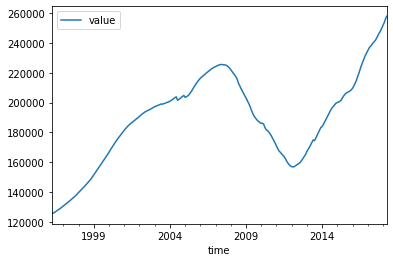

In [28]:
MAtlanta.plot()
pyplot.show()

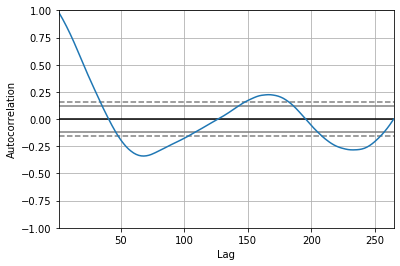

In [29]:
autocorrelation_plot(MAtlanta)
pyplot.show()

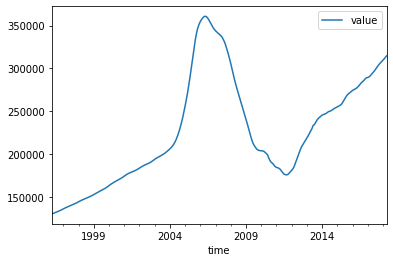

In [30]:
MPhoenix.plot()
pyplot.show()

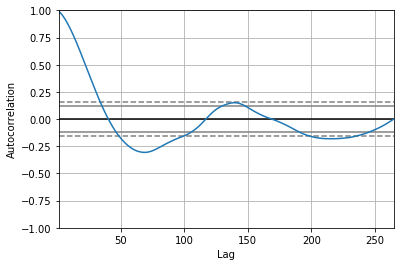

In [31]:
autocorrelation_plot(MPhoenix)
pyplot.show()

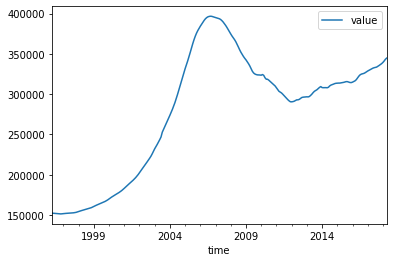

In [32]:
MBaltimore.plot()
pyplot.show()

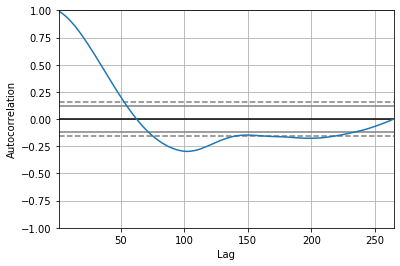

In [33]:
autocorrelation_plot(MBaltimore)
pyplot.show()

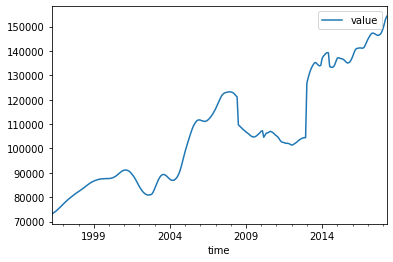

In [34]:
MHuntsville.plot()
pyplot.show()

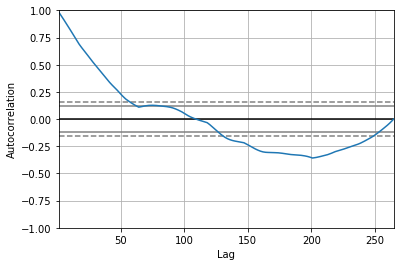

In [35]:
autocorrelation_plot(MHuntsville)
pyplot.show()

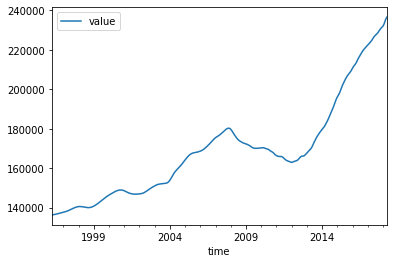

In [36]:
MHouston.plot()
pyplot.show()

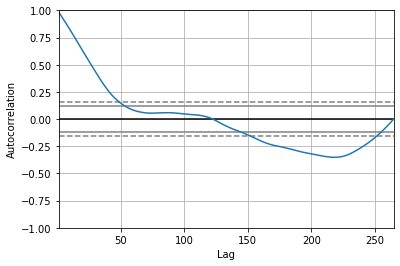

In [37]:
autocorrelation_plot(MHouston)
pyplot.show()

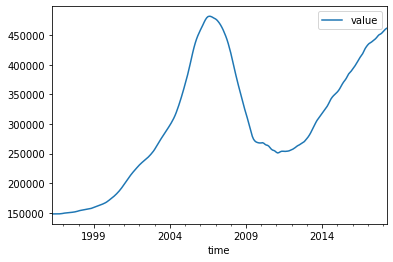

In [38]:
MMiami.plot()
pyplot.show()

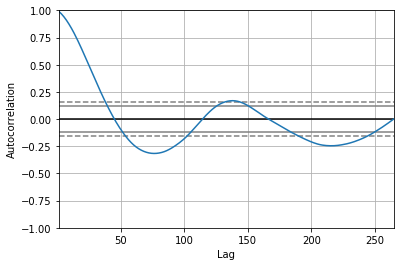

In [39]:
autocorrelation_plot(MMiami)
pyplot.show()

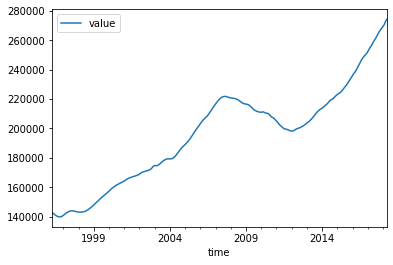

In [40]:
MRaleigh.plot()
pyplot.show()

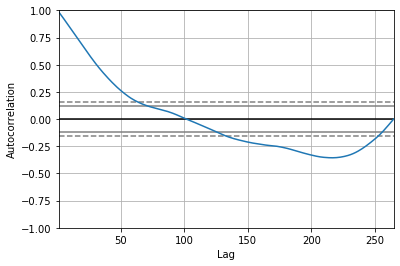

In [41]:
autocorrelation_plot(MRaleigh)
pyplot.show()

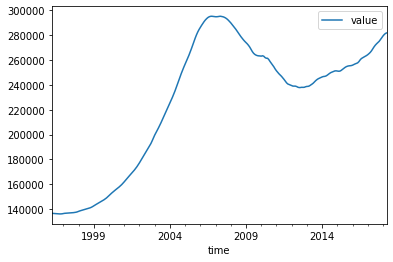

In [42]:
MPhiladelphia.plot()
pyplot.show()

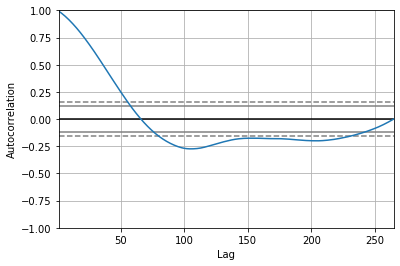

In [43]:
autocorrelation_plot(MPhiladelphia)
pyplot.show()

In [44]:
MPh= MPhiladelphia['value']
MPh

time
1996-04-01    136675.444840
1996-05-01    136610.320285
1996-06-01    136524.911032
1996-07-01    136418.505338
1996-08-01    136317.081851
                  ...      
2017-12-01    277848.754448
2018-01-01    279333.807829
2018-02-01    280505.338078
2018-03-01    281412.455516
2018-04-01    281849.466192
Name: value, Length: 265, dtype: float64

From the Visuals above I see that the data is non stationary. Using the Dickie fuller test I will now test to see if my intuition is correct.

In [45]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(MPh)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))


ADF Statistic: -2.324435
p-value: 0.164208
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573


In [46]:
RaleighSeries = MRaleigh['value']

In [47]:
MiamiSeries  = MMiami['value']

In [48]:
HoustonSeries = MHouston['value']

In [49]:
HuntsvilleSeries= MHuntsville['value']

In [50]:
BaltimoreSeries = MBaltimore['value']

In [51]:
PhoenixSeries =MPhoenix['value']

In [52]:
AtlantaSeries = MAtlanta['value']

In [53]:
PhiladelphiaSeries= MPhiladelphia['value']

# Step 5: ARIMA Modeling

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                  264
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -1773.370
Method:                       css-mle   S.D. of innovations            198.759
Date:                Wed, 06 May 2020   AIC                           3552.740
Time:                        14:56:42   BIC                           3563.468
Sample:                    05-01-1996   HQIC                          3557.051
                         - 04-01-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           444.7418    565.004      0.787      0.431    -662.646    1552.130
ar.L1.D.value     0.9817      0.010     98.128      0.000       0.962       1.001
                                    Root

/Users/andrewghan/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/andrewghan/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


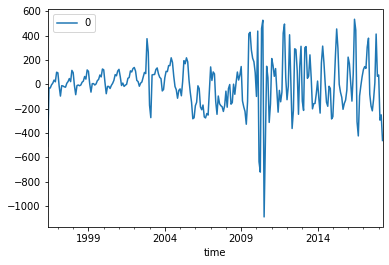

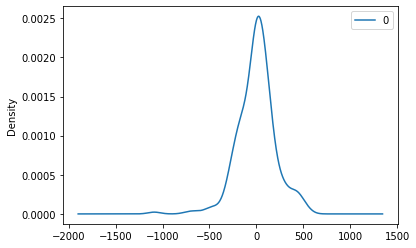

                 0
count   264.000000
mean      1.896452
std     201.504832
min   -1088.604137
25%    -108.884836
50%       7.570373
75%     101.785113
max     533.636175


In [54]:
model = ARIMA(PhiladelphiaSeries, order=(1,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [123]:

yhat = model_fit.forecast(steps=800)


[282286.61840522 282723.90956399 283161.33712476 283598.89859035
 284036.59150933 284474.41347511 284912.36212521 285350.43514035
 285788.63024374 286226.94520026 286665.37781571 287103.92593608
 287542.58744676 287981.36027188 288420.24237355 288859.23175122
 289298.32644094 289737.52451473 290176.82407988 290616.22327837
 291055.72028615 291495.31331261 291935.0005999  292374.78042233
 292814.65108584 293254.61092737 293694.65831429 294134.79164389
 294575.00934277 295015.30986636 295455.69169835 295896.1533502
 296336.69336061 296777.31029505 297218.00274523 297658.76932867
 298099.60868818 298540.51949141 298981.50043042 299422.55022121
 299863.66760328 300304.85133922 300746.10021425 301187.41303585
 301628.78863333 302070.22585742 302511.7235799  302953.28069321
 303394.89611006 303836.56876305 304278.29760435 304720.08160529
 305161.91975605 305603.81106529 306045.75455981 306487.74928423
 306929.79430068 307371.88868843 307814.03154363 308256.22197896
 308698.45912336 309140.74

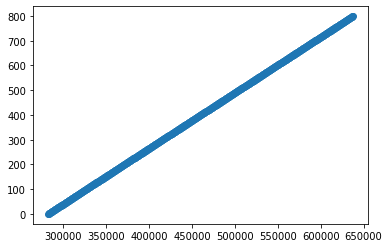

In [124]:
print(yhat[0])
y= range(len(yhat[0]))
print(y)
pyplot.scatter(yhat[0],y)

In [57]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [125]:

train, test = train_test_split(PhiladelphiaSeries, train_size=150)

In [126]:
model = pm.auto_arima(train, seasonal=True, m=12)


/Users/andrewghan/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/andrewghan/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/andrewghan/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/andrewghan/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/andrewghan/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likel

In [131]:
forecasts.shape

(115,)

In [128]:
train.shape

(150,)

In [129]:
test.shape

(115,)

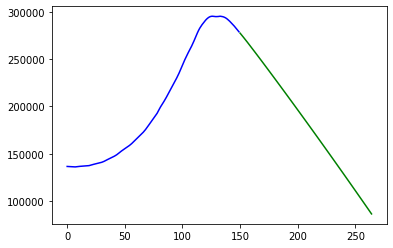

In [132]:
# make your forecasts
forecasts = model.predict(test.shape[0])  # predict N steps into the future

# Visualize the forecasts (blue=train, green=forecasts)
x = np.arange(PhiladelphiaSeries.shape[0])
plt.plot(x[:150], train, c='blue')
plt.plot(x[150:], forecasts, c='green')
plt.show()

In [182]:
def GDPpercchange(second,first):
    DeltaGDP = ((second - first)/first)*100
    DeltaGDP = np.round(DeltaGDP,2)
    return DeltaGDP

    

All GDP Data is from https://www.bea.gov/

Phoniex GDP

In [183]:
GDPpercchange(172976050,189049686)

-8.5

In [184]:
GDPpercchange(255211769,172976050)

47.54

Phoniex Tech GDP 

In [185]:
GDPpercchange(5445614,5338975)

2.0

In [186]:
GDPpercchange(9428552,5338975)

76.6

Houston GDP

In [187]:
GDPpercchange(324638408,331049498)

-1.94

In [188]:
GDPpercchange(478778576,324638408)

47.48

Houston Tech GDP

In [211]:
#from 2006-2017
GDPpercchange(9032605,7081749)

27.55

Huntsville GDP

In [189]:
GDPpercchange(20436982,19062619)

7.21

In [190]:
GDPpercchange(27558022,20436982)

34.84

Huntsville Tech GDP

In [212]:
GDPpercchange(368868,309064)

19.35

In [213]:
GDPpercchange(627747,368868)

70.18

Altanta GDP

In [191]:
GDPpercchange(261817867,271327784)

-3.5

In [192]:
GDPpercchange(397261292,261817867)

51.73

Atlanta Tech GDP

In [215]:
#From 2008 to 2018
GDPpercchange(43253614,29115420)

48.56

Baltimore GDP

In [193]:
GDPpercchange(149240219,143054171)

4.32

In [194]:
GDPpercchange(205313937,149240219)

37.57

Baltimore tech GDP

In [220]:
#2007 - 2009
GDPpercchange(6082449,4653103)

30.72

In [221]:
#2009 - 20014
GDPpercchange(5320115,6082449)

-12.53

In [222]:
#2014 - 2018
GDPpercchange(7298961,5320115)

37.2

Raleigh GDP

In [223]:
GDPpercchange(50373664,49429909)

1.91

In [224]:
GDPpercchange(83665937,50373664)

66.09

Raleigh tech GDP

In [225]:
GDPpercchange(3747575,3338700)

12.25

In [226]:
GDPpercchange(6782874,3747575)

80.99

Miami GDP

In [227]:
GDPpercchange(238102779,254692208)

-6.51

In [228]:
GDPpercchange(354740098,238102779)

48.99

Miami tech GDP

In [229]:
GDPpercchange(13946106,12984924)

7.4

In [230]:
GDPpercchange(18732527,13946106)

34.32

Philadelphia GDP 

In [231]:
GDPpercchange(333097118,325768933)

2.25

In [232]:
GDPpercchange(444148100,333097118)

33.34

philadelphia tech GDP


In [233]:
GDPpercchange(25073228,19735404)

27.05

In [234]:
GDPpercchange(35291891,25073228)

40.76

Austin GDP

In [235]:
GDPpercchange(84130319,81470968)

3.26

In [236]:
GDPpercchange(146784519,84130319)

74.47

Austin Tech GDP

In [237]:
GDPpercchange(5628395,6337840)

-11.19

In [238]:
#used 2017 instead of 2018 because of the lack of data 
GDPpercchange(8668981,5628395)

54.02

# Employment data of Information technology

All Employment Data is from https://www.bls.gov/oes/tables.htm

## Raliegh employment rate 

In [245]:
#2007 - 2009
GDPpercchange(21800,20590)

5.88

In [246]:
#2009 - 2018
GDPpercchange(35840,21800)

64.4

## Atlanta 


In [243]:
#2007 - 2009 
GDPpercchange(77020,71830)

7.23

In [244]:
#2009-2018
GDPpercchange(123340,77020)

60.14

## Phoenix

In [247]:
GDPpercchange(43960,43250)

1.64

In [248]:
GDPpercchange(75730,43960)

72.27

## Baltimore 

In [250]:
GDPpercchange(43960,42710)

2.93

In [249]:
GDPpercchange(64790,43960)

47.38

## Huntsville

In [252]:
GDPpercchange(12580,12450)

1.04

In [251]:
GDPpercchange(15320,12580)

21.78

## Austin

In [253]:
GDPpercchange(41560,40140)

3.54

In [254]:
GDPpercchange(61460,41560)

47.88

## Miami

In [255]:
GDPpercchange(16510,15360)

7.49

In [256]:
GDPpercchange(55680,16510)

237.25

## Philadelphia 

In [257]:
GDPpercchange(56620,54650)

3.6

In [258]:
GDPpercchange(99080,56620)

74.99